## Dataset

A Belgium's real estate dataset of 52k+ observations were scrapped from [immoweb](https://www.immoweb.be/en) from a previous BeCode [Data Collecting Challenge](https://github.com/kaiyungtan/challenge-collecting-data).

In order to get geographical informations about the data, Postal Codes dataset from [https://data.gov.be/](https://data.gov.be/fr/dataset/328ba4f140ba0e870dfc9c70635fe7c1840980b1) is merged with  the real estate dataset during a previous BeCode [Data Analysis Challenge](https://github.com/kaiyungtan/Real-Estate-data-analysis).

This notebook will revisit the cleaning process of the dataset for the real estate prediction challenge.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Dataset_URL = "https://raw.githubusercontent.com/kaiyungtan/Real-Estate-data-analysis/master/data/raw/dataset_house_apartment.csv"
Postal_Code_URL = "https://raw.githubusercontent.com/kaiyungtan/Real-Estate-data-analysis/master/data/raw/code-postaux-belge.csv"

df = pd.read_csv(Dataset_URL, sep = ',')
postal_codes = pd.read_csv(Postal_Code_URL, sep = ';')

In [3]:
df.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203,1,None,0,1,None,0,None,95.0,None,2,0,to be done up,1901
1,1880,house,villa,525000,for sale,6.0,250,1,None,0,1,40,1,430,826.0,None,4,0,as new,1992
2,4900,house,exceptional property,550000,for sale,11.0,475,1,None,0,1,None,1,1400,1543.0,None,4,0,good,1853
3,7912,house,villa,550000,for sale,4.0,325,1,None,0,1,125,1,2333,3570.0,None,4,0,good,1918
4,6032,house,house,550000,for sale,5.0,400,1,None,0,1,80,1,500,616.0,None,3,0,as new,1977


In [4]:
postal_codes.head()

,column_1,column_2,column_3,column_4,coordonnees,geom
0,1060,Saint-Gilles,4.345668,50.826741,"50.8267409, 4.345668",NaN
1,1080,Molenbeek-Saint-Jean,4.322778,50.854355,"50.8543551, 4.3227779",NaN
2,1083,Ganshoren,4.317510,50.871240,"50.8712396, 4.3175103",NaN
3,1120,Neder-Over-Heembeek,4.390489,50.897796,"50.89779605, 4.39048886842",NaN
4,1300,Wavre,4.607744,50.716419,"50.7164189, 4.607744",NaN


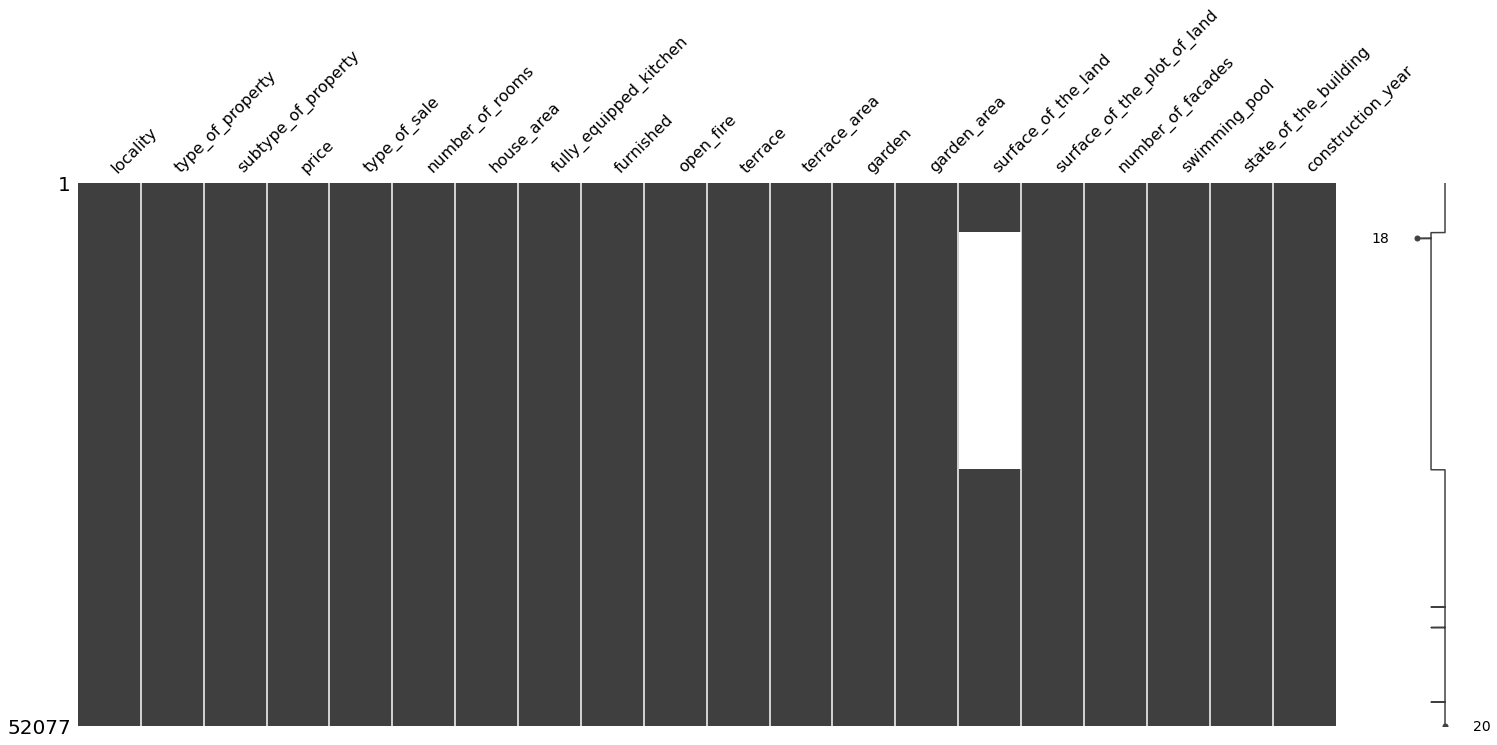

In [5]:
import missingno as msno
msno.matrix(df);

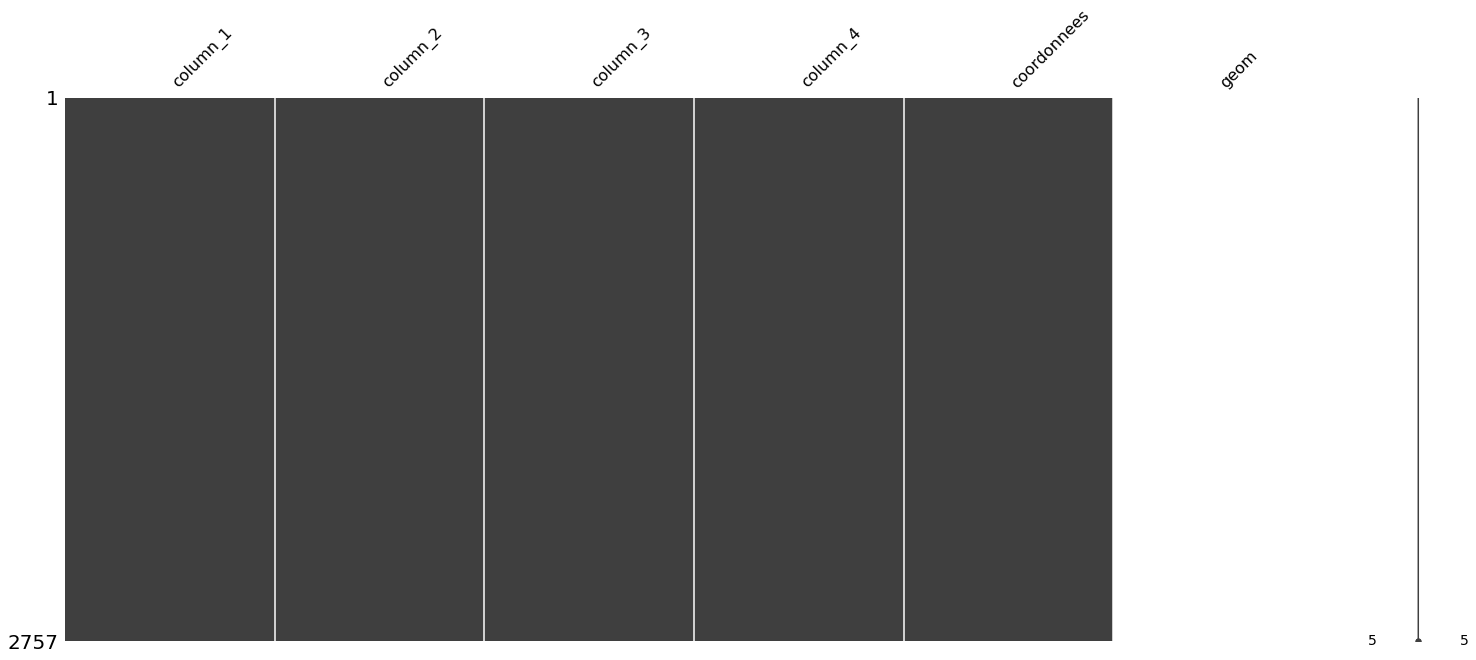

In [6]:
msno.matrix(postal_codes);

In [7]:
print(df.info())
print(df.isna().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52077 entries, 0 to 52076
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     52077 non-null  int64  
 1   type_of_property             52077 non-null  object 
 2   subtype_of_property          52077 non-null  object 
 3   price                        52077 non-null  object 
 4   type_of_sale                 52077 non-null  object 
 5   number_of_rooms              52075 non-null  float64
 6   house_area                   52077 non-null  object 
 7   fully_equipped_kitchen       52077 non-null  int64  
 8   furnished                    52077 non-null  object 
 9   open_fire                    52077 non-null  int64  
 10  terrace                      52077 non-null  int64  
 11  terrace_area                 52077 non-null  object 
 12  garden                       52077 non-null  int64  
 13  garden_area     

,locality,number_of_rooms,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,swimming_pool
count,52077.000000,52075.000000,52077.000000,52077.000000,52077.000000,52077.000000,29353.000000,52077.000000
mean,5406.222728,2.814575,0.652284,0.046950,0.563569,0.289859,992.812046,0.015957
std,2958.590968,2.202981,0.476250,0.211533,0.495947,0.453701,5026.021908,0.125311
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2600.000000,2.000000,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000
50%,5060.000000,3.000000,1.000000,0.000000,1.000000,0.000000,350.000000,0.000000
75%,8430.000000,3.000000,1.000000,0.000000,1.000000,1.000000,810.000000,0.000000
max,9992.000000,204.000000,1.000000,1.000000,1.000000,1.000000,400000.000000,1.000000


In [8]:
print(postal_codes.info())
print(postal_codes.isna().sum())
postal_codes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   column_1     2757 non-null   int64  
 1   column_2     2757 non-null   object 
 2   column_3     2757 non-null   float64
 3   column_4     2757 non-null   float64
 4   coordonnees  2757 non-null   object 
 5   geom         0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 129.4+ KB
None
column_1          0
column_2          0
column_3          0
column_4          0
coordonnees       0
geom           2757
dtype: int64


,column_1,column_3,column_4,geom
count,2757.000000,2757.000000,2757.000000,0.0
mean,5703.137468,4.562568,50.644955,NaN
std,2431.220433,0.832346,0.374315,NaN
min,1000.000000,2.580670,49.508502,NaN
25%,3840.000000,3.926957,50.422971,NaN
50%,5575.000000,4.632291,50.683981,NaN
75%,7621.000000,5.245072,50.905669,NaN
max,9992.000000,6.340056,51.474352,NaN


## Postal Code Aggregation

In [9]:
# Drop empty column(geom) & not used column (coordonnees)
postal_codes.drop(columns=['coordonnees', 'geom'], inplace=True)

# Rename the columns
postal_codes.rename(columns={"column_1": "locality", "column_2": "city_name", 'column_3': 'longitude', 'column_4': 'lattitude'}, inplace=True)

# Drop the localities' duplicates
postal_codes.drop_duplicates(subset=['locality'], inplace=True)

In [10]:
# Merge df & postal_codes

df = pd.merge(df, postal_codes, on=['locality'], how='inner')

df.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,...,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,city_name,longitude,lattitude
0,1050,house,house,340000,for sale,6.0,203,1,None,0,...,None,95.0,None,2,0,to be done up,1901,Ixelles,4.381571,50.822285
1,1050,house,mixed use building,520000,for sale,4.0,200,0,None,0,...,None,69.0,None,2,0,to renovate,1940,Ixelles,4.381571,50.822285
2,1050,house,house,no price,for sale,6.0,None,1,None,0,...,None,0.0,None,None,0,None,1910,Ixelles,4.381571,50.822285
3,1050,house,house,599000,for sale,4.0,160,1,None,0,...,55,100.0,None,2,0,to be done up,1898,Ixelles,4.381571,50.822285
4,1050,house,house,599000,for sale,3.0,160,1,None,0,...,60,130.0,None,2,0,good,1953,Ixelles,4.381571,50.822285


## Drop duplicates row , missing values & rename columns

In [11]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(50841, 23)

In [13]:
# rename columns name 'locality' to 'postal_code'

df.rename(columns={'locality' :'postal_code'},inplace=True)


In [14]:
# Move column: 'city_name' next to 'postal_code'

second_col = df.pop("city_name")

df.insert(1, "city_name", second_col)


In [15]:
df.describe(include='object') 

,city_name,type_of_property,subtype_of_property,price,type_of_sale,house_area,furnished,terrace_area,garden_area,surface_of_the_plot_of_land,number_of_facades,state_of_the_building,construction_year
count,50841,50841,50841,50841,50841,50841,50841,50841,50841,50841,50841,50841,50841
unique,1070,2,24,4220,1,693,1,185,1192,1,5,7,220
top,Antwerpen,house,house,249000,for sale,None,None,None,None,None,2,as new,None
freq,1028,29001,21809,674,50841,8430,50841,33745,42491,50841,17834,14358,20958


In [16]:
# Drop columns with only 1 unique value

df.drop(columns=['type_of_sale','furnished','surface_of_the_plot_of_land'],inplace=True)
df.shape

(50841, 20)

In [17]:
df.isna().sum()

postal_code                   0
city_name                     0
type_of_property              0
subtype_of_property           0
price                         0
number_of_rooms               2
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
terrace_area                  0
garden                        0
garden_area                   0
surface_of_the_land       21840
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
construction_year             0
longitude                     0
lattitude                     0
dtype: int64

In [18]:
#  different type of property counts
df.type_of_property.value_counts()

house        29001
apartment    21840
Name: type_of_property, dtype: int64

### Comment : 
* In the dataset, it shows that apartment has 21840 observations which corresponde to 21840 missing values on surface of the land. 

* Instead of filling in 0 for all the missing values in surface of the land for apartment, we will seperate the dataset to df_house & df_apartment for different analysis.

In [19]:
df_house = df[df['type_of_property'] == 'house']
df_apartment = df[df['type_of_property'] == 'apartment']

In [20]:
df_house

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
0,1050,Ixelles,house,house,340000,6.0,203,1,0,1,None,0,None,95.0,2,0,to be done up,1901,4.381571,50.822285
1,1050,Ixelles,house,mixed use building,520000,4.0,200,0,0,0,None,0,None,69.0,2,0,to renovate,1940,4.381571,50.822285
2,1050,Ixelles,house,house,no price,6.0,None,1,0,0,None,0,None,0.0,None,0,None,1910,4.381571,50.822285
3,1050,Ixelles,house,house,599000,4.0,160,1,0,1,None,1,55,100.0,2,0,to be done up,1898,4.381571,50.822285
4,1050,Ixelles,house,house,599000,3.0,160,1,0,1,15,1,60,130.0,2,0,good,1953,4.381571,50.822285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52071,1472,Vieux-Genappe,house,villa,475000,5.0,215,1,0,1,None,0,None,1550.0,None,1,good,None,4.401503,50.629025
52072,1461,Haut-Ittre,house,villa,499000,5.0,275,1,0,1,None,1,None,1561.0,4,0,None,1983,4.296472,50.648804
52073,1761,Borchtlombeek,house,villa,495000,4.0,235,1,0,0,None,1,None,488.0,4,0,None,2020,4.136915,50.848178
52074,5576,Froidfontaine,house,house,465000,8.0,None,0,0,1,None,0,None,0.0,4,0,None,None,5.000634,50.060403


In [21]:
df_apartment

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
48,1050,Ixelles,apartment,flat studio,150000,0.0,45,1,0,0,None,1,None,NaN,1,0,to be done up,None,4.381571,50.822285
49,1050,Ixelles,apartment,flat studio,150000,0.0,35,1,0,0,None,0,None,NaN,None,0,to be done up,None,4.381571,50.822285
50,1050,Ixelles,apartment,flat studio,150000,0.0,20,0,0,0,None,0,None,NaN,2,0,None,None,4.381571,50.822285
51,1050,Ixelles,apartment,flat studio,150000,1.0,36,1,0,0,None,0,None,NaN,4,0,to renovate,1968,4.381571,50.822285
52,1050,Ixelles,apartment,flat studio,120000,0.0,25,0,0,0,None,0,None,NaN,None,0,good,None,4.381571,50.822285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51278,6211,Mellet,apartment,apartment,310000,3.0,127,1,0,1,None,0,None,NaN,None,0,as new,2019,4.478201,50.504621
51279,6211,Mellet,apartment,apartment,310000,3.0,129,1,0,0,None,0,None,NaN,None,0,as new,2019,4.478201,50.504621
51280,6211,Mellet,apartment,apartment,305000,3.0,129,0,0,1,None,0,None,NaN,None,0,as new,2019,4.478201,50.504621
51289,3052,Blanden,apartment,apartment,391400,2.0,103,1,0,0,None,0,None,NaN,None,0,as new,2020,4.705680,50.828167


In [22]:
df_house.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
subtype_of_property       0
price                     0
number_of_rooms           1
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
terrace_area              0
garden                    0
garden_area               0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
construction_year         0
longitude                 0
lattitude                 0
dtype: int64

In [23]:
df_apartment.isna().sum()

postal_code                   0
city_name                     0
type_of_property              0
subtype_of_property           0
price                         0
number_of_rooms               1
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
terrace_area                  0
garden                        0
garden_area                   0
surface_of_the_land       21840
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
construction_year             0
longitude                     0
lattitude                     0
dtype: int64

In [24]:
# drop 1 row of missing value for columns: number_of_rooms)
df_house.dropna(inplace=True)

In [25]:
# drop surface_of_the_land column
df_apartment.drop('surface_of_the_land',axis=1,inplace=True)

In [26]:
# drop 1 row of missing value for columns: number_of_rooms)
df_apartment.dropna(inplace=True)

In [27]:
df_house.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
subtype_of_property       0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
terrace_area              0
garden                    0
garden_area               0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
construction_year         0
longitude                 0
lattitude                 0
dtype: int64

In [28]:
df_apartment.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
subtype_of_property       0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
terrace_area              0
garden                    0
garden_area               0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
construction_year         0
longitude                 0
lattitude                 0
dtype: int64

## Columns cleaning

In [29]:
# Function to clean unique and dtype of a given column.

def print_unique_dtype(df,column):
    """
    Print unique and dtype of a given column
    """

    unique = df[column].value_counts().nunique()
    dtype = df[column].dtype

    print(f"{unique} - {dtype}")

### postal_code 

In [30]:
# Postal Code is used earlier to aggregate the city name and regions,
# so we know it's already clean.

print_unique_dtype(df_house,'postal_code')

124 - int64


In [31]:
print_unique_dtype(df_apartment,'postal_code')

127 - int64


### city_name

In [32]:
# City name is an "object", it come from the aggregated city name,
# so we know it's already clean -> Str.

print_unique_dtype(df_house,'city_name')

126 - object


In [33]:
print_unique_dtype(df_apartment,'city_name')

125 - object


### subtype_of_property

In [34]:
# Subtype of property is related to the property's type.
# We'll drop "castle" and "pavillon"

print_unique_dtype(df_house,'subtype_of_property')
df_house.subtype_of_property.value_counts()

14 - object


house                   21809
villa                    2796
apartment block          1038
mixed use building        983
mansion                   459
exceptional property      447
town house                409
country cottage           317
bungalow                  280
farmhouse                 143
chalet                    138
manor house                85
other property             85
castle                     10
pavilion                    1
Name: subtype_of_property, dtype: int64

In [35]:
print_unique_dtype(df_apartment,'subtype_of_property')
df_apartment.subtype_of_property.value_counts()

9 - object


apartment       16904
duplex           1371
ground floor     1170
penthouse         886
flat studio       852
service flat      284
loft              216
kot                83
triplex            73
Name: subtype_of_property, dtype: int64

In [36]:
# Drop Triplex & Penthouse.
df_apartment = df_apartment[(df_apartment['subtype_of_property'] != 'triplex') & 
                            (df_apartment['subtype_of_property'] != 'penthouse')]

In [37]:
# Drop Farmhouse & Country cottage 
df_house = df_house[(df_house['subtype_of_property'] != 'farmhouse') & 
                    (df_house['subtype_of_property'] != 'country cottage')]

In [38]:
# Drop Exceptional property & Mixed-use building
df_house = df_house[(df_house['subtype_of_property'] != 'exceptional property') &
                    (df_house['subtype_of_property'] != 'mixed use building')]

In [39]:
# Drop Mansion & Other properties 
df_house = df_house[(df_house['subtype_of_property'] != 'mansion') & 
                    (df_house['subtype_of_property'] != 'other property')]

In [40]:
# Drop castle & pavilion & apartment block.
df_house = df_house[(df_house['subtype_of_property'] != 'castle') & (df_house['subtype_of_property'] != 'pavilion') &
                    (df_house['subtype_of_property'] != 'apartment block')]

In [41]:
df_apartment.groupby('type_of_property')['subtype_of_property'].value_counts()

type_of_property  subtype_of_property
apartment         apartment              16904
                  duplex                  1371
                  ground floor            1170
                  flat studio              852
                  service flat             284
                  loft                     216
                  kot                       83
Name: subtype_of_property, dtype: int64

In [42]:
df_house.groupby('type_of_property')['subtype_of_property'].value_counts()

type_of_property  subtype_of_property
house             house                  21809
                  villa                   2796
                  town house               409
                  bungalow                 280
                  chalet                   138
                  manor house               85
Name: subtype_of_property, dtype: int64

In [43]:
df.shape

(50841, 20)

In [44]:
# Drop subtype_of_property column since majority of the subtype is either apartment (16904) or house(21809)
df_house.drop(columns=['subtype_of_property'],inplace=True)
df_apartment.drop(columns=['subtype_of_property'],inplace=True)

### price

In [45]:
df['price']

0          340000
1          520000
2        no price
3          599000
4          599000
           ...   
52071      475000
52072      499000
52073      495000
52074      465000
52075      485000
Name: price, Length: 50841, dtype: object

In [46]:
# Remove the "no price" string from price column.
df_house['price'] = df_house[df_house.price != "no price"]['price']
df_house.dropna(inplace=True)

# Convert the price to int
df_house['price'] = df_house['price'].astype(int)


df_house.shape
df_house['price'].dtype

(25467, 19)

dtype('int64')

In [47]:
# Remove the "no price" string from price column.
df_apartment['price'] = df_apartment[df_apartment.price != "no price"]['price']
df_apartment.dropna(inplace=True)

# Convert the price to int
df_apartment['price'] = df_apartment['price'].astype(int)


df_apartment.shape
df_apartment['price'].dtype

(20865, 18)

dtype('int64')

### number_of_rooms

In [48]:
# some houses has number of rooms more than 10

df_house.number_of_rooms.value_counts()

3.0      11709
4.0       6038
2.0       4056
5.0       1993
6.0        684
1.0        532
7.0        193
0.0        101
8.0         68
10.0        30
9.0         28
11.0        10
12.0         7
15.0         6
13.0         2
16.0         2
20.0         2
17.0         1
24.0         1
18.0         1
14.0         1
165.0        1
23.0         1
Name: number_of_rooms, dtype: int64

In [49]:
df_house.number_of_rooms.describe()

count    25467.000000
mean         3.340873
std          1.565099
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max        165.000000
Name: number_of_rooms, dtype: float64

In [50]:
filt = df_house.number_of_rooms == 0
df_house[filt]

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
745,8310,Assebroek,house,795000,0.0,None,0,0,0,None,1,None,572.0,2,0,good,1918,3.257079,51.193320
1021,8380,Lissewege,house,450000,0.0,220,0,0,0,None,0,None,178.0,None,0,as new,None,3.199182,51.317114
1431,8000,Brugge,house,165000,0.0,43,0,0,0,None,0,None,0.0,None,0,good,None,3.207361,51.214708
1537,8000,Brugge,house,498000,0.0,190,0,0,0,None,0,None,160.0,None,0,good,None,3.207361,51.214708
2473,4000,Glain,house,127000,0.0,129,1,0,0,None,0,None,225.0,3,0,None,None,5.541864,50.648205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51419,5670,Le Mesnil,house,120000,0.0,296,0,0,0,None,0,None,133.0,3,0,None,None,4.671299,50.030867
51466,5630,Daussois,house,50000,0.0,None,1,0,0,None,1,None,1006.0,4,0,None,None,4.455439,50.218825
51487,5621,Hanzinelle,house,35000,0.0,100,1,0,0,None,0,None,0.0,2,0,None,None,4.560710,50.294987
51506,5621,Hanzinelle,house,420000,0.0,1000,1,0,0,None,0,None,0.0,3,0,None,None,4.560710,50.294987


In [51]:
# Remove number_of_rooms = 0

df_house = df_house[~filt]

In [52]:
# Remove number_of_rooms > 10

filt = df_house['number_of_rooms'] > 10

df_house = df_house[~filt]

In [53]:
# Convert to int
df_house['number_of_rooms'] = df_house['number_of_rooms'].astype(int)

df_house['number_of_rooms'].value_counts()
df_house.shape

3     11709
4      6038
2      4056
5      1993
6       684
1       532
7       193
8        68
10       30
9        28
Name: number_of_rooms, dtype: int64

(25331, 19)

In [54]:
# some apartments has number of rooms more than 10

df_apartment.number_of_rooms.value_counts()

2.0     11329
1.0      4234
3.0      3980
0.0       759
4.0       424
5.0        66
6.0        33
8.0        18
9.0         7
7.0         6
10.0        5
11.0        2
13.0        1
33.0        1
Name: number_of_rooms, dtype: int64

In [55]:
df_apartment.number_of_rooms.describe()

count    20865.000000
mean         1.985286
std          0.896495
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         33.000000
Name: number_of_rooms, dtype: float64

In [56]:
filt = df_apartment.number_of_rooms == 0
df_apartment[filt]

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
48,1050,Ixelles,apartment,150000,0.0,45,1,0,0,None,1,None,1,0,to be done up,None,4.381571,50.822285
49,1050,Ixelles,apartment,150000,0.0,35,1,0,0,None,0,None,None,0,to be done up,None,4.381571,50.822285
50,1050,Ixelles,apartment,150000,0.0,20,0,0,0,None,0,None,2,0,None,None,4.381571,50.822285
52,1050,Ixelles,apartment,120000,0.0,25,0,0,0,None,0,None,None,0,good,None,4.381571,50.822285
53,1050,Ixelles,apartment,115000,0.0,20,0,0,0,None,0,None,None,0,good,None,4.381571,50.822285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,6441,Erpion,apartment,55000,0.0,27,0,0,0,None,0,None,None,0,good,None,4.351232,50.211889
49607,7300,Boussu,apartment,100000,0.0,None,1,0,0,None,0,None,3,0,None,None,3.796090,50.433125
49984,1435,Mont-Saint-Guibert,apartment,148000,0.0,34,1,0,1,4,1,None,1,0,as new,2020,4.612702,50.636563
49986,1435,Mont-Saint-Guibert,apartment,172500,0.0,45,1,0,1,15,1,54,1,0,as new,2019,4.612702,50.636563


In [57]:
# to check why number_of_rooms is 0 in apartment

df[df['subtype_of_property'] == 'flat studio']

# results shows most of flat studio gives number_of_rooms = 0

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
48,1050,Ixelles,apartment,flat studio,150000,0.0,45,1,0,0,None,1,None,NaN,1,0,to be done up,None,4.381571,50.822285
49,1050,Ixelles,apartment,flat studio,150000,0.0,35,1,0,0,None,0,None,NaN,None,0,to be done up,None,4.381571,50.822285
50,1050,Ixelles,apartment,flat studio,150000,0.0,20,0,0,0,None,0,None,NaN,2,0,None,None,4.381571,50.822285
51,1050,Ixelles,apartment,flat studio,150000,1.0,36,1,0,0,None,0,None,NaN,4,0,to renovate,1968,4.381571,50.822285
52,1050,Ixelles,apartment,flat studio,120000,0.0,25,0,0,0,None,0,None,NaN,None,0,good,None,4.381571,50.822285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,6441,Erpion,apartment,flat studio,55000,0.0,27,0,0,0,None,0,None,NaN,None,0,good,None,4.351232,50.211889
49897,1731,Zellik,apartment,flat studio,172000,1.0,None,1,0,1,7,1,123,NaN,1,0,good,None,4.274418,50.884248
49984,1435,Mont-Saint-Guibert,apartment,flat studio,148000,0.0,34,1,0,1,4,1,None,NaN,1,0,as new,2020,4.612702,50.636563
49986,1435,Mont-Saint-Guibert,apartment,flat studio,172500,0.0,45,1,0,1,15,1,54,NaN,1,0,as new,2019,4.612702,50.636563


In [58]:
# Remove number_of_rooms > 10

filt = df_apartment['number_of_rooms'] > 10

df_apartment = df_apartment[~filt]

In [59]:
# Convert to int
df_apartment['number_of_rooms'] = df_apartment['number_of_rooms'].astype(int)

df_apartment['number_of_rooms'].value_counts()
df_apartment.shape

2     11329
1      4234
3      3980
0       759
4       424
5        66
6        33
8        18
9         7
7         6
10        5
Name: number_of_rooms, dtype: int64

(20861, 18)

### house_area

In [60]:
# Lots of None values (5627 entries)
df_house.house_area.value_counts()

None    5627
150      650
140      575
200      554
160      539
        ... 
666        1
595        1
482        1
481        1
908        1
Name: house_area, Length: 573, dtype: int64

In [61]:
df_house.house_area.describe()

count     25331
unique      573
top        None
freq       5627
Name: house_area, dtype: object

In [62]:
# Remove the 'None' (str) entries
df_house = df_house[(df['house_area'] != 'None')]

# Convert the type to int
df_house['house_area'] = df_house['house_area'].astype(int)
 
df_house.shape
df_house['house_area'].dtype

(19704, 19)

dtype('int64')

In [63]:
df_house.house_area.describe()

count    19704.000000
mean       187.813084
std         93.641323
min          1.000000
25%        133.000000
50%        168.000000
75%        220.000000
max       3560.000000
Name: house_area, dtype: float64

In [64]:
filt = df_house['house_area'] < 30
df_house[filt]

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
4936,8670,Wulpen,house,75000,1,28,1,0,0,None,0,None,0.0,None,0,None,1978,2.707312,51.097792
10475,6690,Bihain,house,66105,1,28,1,0,1,8,1,None,28.0,2,0,as new,1985,5.808207,50.239024
16302,3300,Bost,house,425000,3,21,1,0,1,78,1,1342,2208.0,4,0,good,1978,4.933924,50.784632
26785,9150,Rupelmonde,house,278000,2,25,0,0,0,None,0,None,110.0,4,0,good,None,4.290631,51.128369
31634,4102,Ougrée,house,45000,1,18,0,0,1,9,1,9,37.0,2,0,None,None,5.538994,50.599263
36516,8791,Beveren,house,335000,4,5,1,0,0,None,0,None,484.0,None,0,good,1956,3.342747,50.871701
36615,3111,Wezemaal,house,11825,1,13,0,0,0,None,0,None,13.0,2,0,as new,2017,4.768331,50.948255
41784,4845,Jalhay,house,323000,4,1,0,0,1,None,0,None,913.0,None,0,as new,2013,5.964753,50.559253
41786,4845,Jalhay,house,307000,3,1,0,0,0,None,1,500,0.0,4,0,as new,2019,5.964753,50.559253
42235,6464,Bourlers,house,9999,2,20,1,0,1,7,1,180,200.0,4,0,good,None,4.341293,50.027359


In [65]:
# remove house_area < 30
df_house = df_house[~filt]

In [66]:
# Lots of None values (1905 entries)
df_apartment.house_area.value_counts()

None    1905
90       706
80       617
85       562
100      537
        ... 
255        1
319        1
266        1
366        1
286        1
Name: house_area, Length: 335, dtype: int64

In [67]:
df_apartment.house_area.describe()

count     20861
unique      335
top        None
freq       1905
Name: house_area, dtype: object

In [68]:
# Remove the 'None' (str) entries
df_apartment = df_apartment[(df['house_area'] != 'None')]

# Convert the type to int
df_apartment['house_area'] = df_apartment['house_area'].astype(int)
 
df_apartment.shape
df_apartment['house_area'].dtype

(18956, 18)

dtype('int64')

In [69]:
df_apartment.house_area.describe()

count    18956.000000
mean       100.049008
std        233.772248
min          1.000000
25%         75.000000
50%         91.500000
75%        113.000000
max      31700.000000
Name: house_area, dtype: float64

In [70]:
filt = df_apartment['house_area'] < 10
df_apartment[filt]

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
11803,8400,Oostende,apartment,425000,2,1,0,0,1,None,0,None,2,0,good,1961,2.920327,51.230318
23562,3290,Deurne,apartment,265000,2,1,0,0,0,None,1,None,None,0,None,None,5.096457,51.039238
32323,8870,Izegem,apartment,125000,4,5,0,0,0,None,0,None,None,0,as new,None,3.209065,50.913822
43327,8840,Staden,apartment,135000,0,5,0,0,0,None,0,None,None,0,good,None,3.001341,50.970488


In [71]:
# remove house_area < 10
df_apartment = df_apartment[~filt]

### fully_equipped_kitchen

In [72]:
# fully_equiped_kitchen for house is clean

df_house.fully_equipped_kitchen.value_counts() 
df_house.fully_equipped_kitchen.dtype

1    13817
0     5873
Name: fully_equipped_kitchen, dtype: int64

dtype('int64')

In [73]:
# fully_equiped_kitchen for apartment is clean

df_apartment.fully_equipped_kitchen.value_counts() 
df_apartment.fully_equipped_kitchen.dtype

1    13064
0     5888
Name: fully_equipped_kitchen, dtype: int64

dtype('int64')

### open_fire

In [74]:
# open_fire for house is clean

df_house.open_fire.value_counts() 
df_house.open_fire.dtype

0    18028
1     1662
Name: open_fire, dtype: int64

dtype('int64')

In [75]:
# open_fire for apartment is clean

df_apartment.open_fire.value_counts() 
df_apartment.open_fire.dtype

0    18665
1      287
Name: open_fire, dtype: int64

dtype('int64')

### terrace

In [76]:
# terrace is clean for house & apartment

df_house.terrace.value_counts()
df_house.terrace.dtype

df_apartment.terrace.value_counts()
df_apartment.terrace.dtype

1    10953
0     8737
Name: terrace, dtype: int64

dtype('int64')

1    12684
0     6268
Name: terrace, dtype: int64

dtype('int64')

### terrace_area

In [77]:
df_house['terrace_area'].value_counts()

None    14056
20        590
30        445
15        360
25        319
        ...  
124         1
187         1
163         1
159         1
584         1
Name: terrace_area, Length: 145, dtype: int64

In [78]:
# (14056) entries are None, drop terrace_area

df_house.drop(columns=['terrace_area'],inplace=True)


In [79]:
df_apartment['terrace_area'].value_counts()

None    9509
10       688
6        636
8        581
4        498
        ... 
242        1
167        1
217        1
135        1
306        1
Name: terrace_area, Length: 136, dtype: int64

In [80]:
# (9509) entries are None, drop terrace_area

df_apartment.drop(columns=['terrace_area'],inplace=True)

### garden

In [81]:
# garden is clean

df_house.garden.value_counts()
df_house.garden.dtype

df_apartment.garden.value_counts()
df_apartment.garden.dtype

0    10159
1     9531
Name: garden, dtype: int64

dtype('int64')

0    16148
1     2804
Name: garden, dtype: int64

dtype('int64')

### garden_area

In [82]:
df_house['garden_area'].value_counts()

None    13785
100       180
200       176
300       137
150       125
        ...  
691         1
939         1
9045        1
2567        1
4100        1
Name: garden_area, Length: 1062, dtype: int64

In [83]:
# 13785 'None' entries, drop  garden_area 

df_house.drop(columns=['garden_area'],inplace=True)


In [84]:
df_apartment['garden_area'].value_counts()

None    17575
100        49
80         36
40         35
50         35
        ...  
1600        1
1211        1
383         1
121         1
372         1
Name: garden_area, Length: 292, dtype: int64

In [85]:
# 17575 'None' entries, drop  garden_area 

df_apartment.drop(columns=['garden_area'],inplace=True)

### surface_of_the_land

In [86]:
# Surface of the land has 1597 with 0 surface_of_the_land
df_house.surface_of_the_land.value_counts()

0.0       1597
150.0      156
200.0      149
300.0      137
250.0      133
          ... 
1198.0       1
1316.0       1
3183.0       1
1779.0       1
4729.0       1
Name: surface_of_the_land, Length: 2723, dtype: int64

In [87]:
# remove surface_of_the_land that > 5000 & less than 10

filt = (df_house['surface_of_the_land'] > 5000) | \
       ((df_house['surface_of_the_land'] >= 0) & (df_house['surface_of_the_land'] < 10))

df_house[filt]

df_house = df_house[~filt]

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude
6,1050,Ixelles,house,590000,4,225,0,0,1,0,0.0,2,0,to renovate,None,4.381571,50.822285
7,1050,Ixelles,house,575000,4,209,1,0,0,0,0.0,2,0,None,None,4.381571,50.822285
17,1050,Ixelles,house,685000,6,280,1,0,0,0,0.0,2,0,None,1956,4.381571,50.822285
26,1050,Ixelles,house,795000,4,240,1,0,1,1,0.0,2,0,good,1907,4.381571,50.822285
32,1050,Ixelles,house,795000,8,240,1,0,0,0,0.0,2,0,good,None,4.381571,50.822285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51904,5350,Ohey,house,249000,3,313,1,0,1,0,0.0,3,0,good,None,5.123844,50.435907
51990,5022,Cognelée,house,240000,2,230,0,0,0,1,0.0,3,0,as new,1885,4.912729,50.517188
51993,6221,Saint-Amand,house,210000,2,131,1,0,1,0,0.0,3,0,good,None,4.531924,50.511168
52064,4342,Hognoul,house,425000,3,315,1,0,1,1,0.0,3,0,None,2002,5.455639,50.680810


### number_of_facades

In [88]:
# Number of facades has a lot of None value.
# Also, some house have only 1 facade.

df_house.number_of_facades.value_counts()

4       5358
2       5262
3       4649
None    2331
1        109
Name: number_of_facades, dtype: int64

In [89]:
# Replace 'None' by 0
df_house['number_of_facades'] = df_house['number_of_facades'].replace({"None": 0}).astype(int)

df_house.number_of_facades.value_counts()

4    5358
2    5262
3    4649
0    2331
1     109
Name: number_of_facades, dtype: int64

In [90]:
# Number of facades has a lot of None value.
# Also, some house have only 1 facade.

df_apartment.number_of_facades.value_counts()

2       7762
None    7449
3       1852
4       1565
1        324
Name: number_of_facades, dtype: int64

In [91]:
# Replace 'None' by 0
df_apartment['number_of_facades'] = df_apartment['number_of_facades'].replace({"None": 0}).astype(int)
 
df_apartment.number_of_facades.value_counts()

2    7762
0    7449
3    1852
4    1565
1     324
Name: number_of_facades, dtype: int64

### swimming_pool

In [92]:
# Swimming pool data is clean
df_house.swimming_pool.value_counts()
df_apartment.swimming_pool.value_counts()

0    17330
1      379
Name: swimming_pool, dtype: int64

0    18785
1      167
Name: swimming_pool, dtype: int64

### state_of_the_building

In [93]:
# State of the building data has 'None'
df_house.state_of_the_building.value_counts()

good              5157
None              4195
as new            3839
to be done up     1742
to renovate       1701
just renovated     992
to restore          83
Name: state_of_the_building, dtype: int64

In [94]:
# Replace 'None' by 'unknown' & "to be done up & to restore" to 'to renovate'
df_house['state_of_the_building'] = df_house['state_of_the_building'].replace({"None": "unknown",
                                                                   "to be done up" : "to renovate",
                                                                   "to restore" : "to renovate"
                                                                   })
df_house.state_of_the_building.value_counts()

good              5157
unknown           4195
as new            3839
to renovate       3526
just renovated     992
Name: state_of_the_building, dtype: int64

In [95]:
# State of the building data has 'None'
df_apartment.state_of_the_building.value_counts()

as new            7364
good              4828
None              4711
just renovated     960
to be done up      726
to renovate        347
to restore          16
Name: state_of_the_building, dtype: int64

In [96]:
# Replace 'None' by 'unknown' & "to be done up & to restore" to 'to renovate'
df_apartment['state_of_the_building'] = df_apartment['state_of_the_building'].replace({"None": "unknown",
                                                                   "to be done up" : "to renovate",
                                                                   "to restore" : "to renovate"
                                                                   })
df_apartment.state_of_the_building.value_counts()

as new            7364
good              4828
unknown           4711
to renovate       1089
just renovated     960
Name: state_of_the_building, dtype: int64

### construction_year

In [97]:
df_house.construction_year.value_counts(normalize=True) 

None    0.420972
2020    0.058840
2019    0.025750
1930    0.020329
1950    0.016319
          ...   
1759    0.000056
1789    0.000056
1876    0.000056
1864    0.000056
1780    0.000056
Name: construction_year, Length: 186, dtype: float64

In [98]:
# 42% of data construction year unknown for houses.

df_house['construction_year'] = df_house['construction_year'].replace({"None": "unknown"}) 
df_house.construction_year.value_counts(normalize=True)

unknown    0.420972
2020       0.058840
2019       0.025750
1930       0.020329
1950       0.016319
             ...   
1861       0.000056
1802       0.000056
1896       0.000056
1897       0.000056
1780       0.000056
Name: construction_year, Length: 186, dtype: float64

In [99]:
# 30% of data construction year unknown for apartment

df_apartment['construction_year'] = df_apartment['construction_year'].replace({"None": "unknown"}) 
df_apartment.construction_year.value_counts(normalize=True)

unknown    0.303134
2020       0.106374
2019       0.071233
2018       0.036408
2017       0.018204
             ...   
1897       0.000053
1902       0.000053
1919       0.000053
1892       0.000053
1917       0.000053
Name: construction_year, Length: 148, dtype: float64

In [100]:
# Drop unknown construction_year
df_house = df_house[(df_house['construction_year'] != 'unknown')]
df_apartment = df_apartment[(df_apartment['construction_year'] != 'unknown')]

In [101]:
df_house.shape

(10254, 17)

In [102]:
df_apartment.shape

(13207, 16)

## Provinces and regions aggregation

In [103]:
# This cell create a dictionnary of all postal codes, and their associated provinces and regions.

provinces = {
    'Bruxelles-Capitale': {
        'range': [(1000, 1299)],
        'region': 'Bruxelles'
    },
    'Brabant wallon': {
        'range': [(1300, 1499)],
        'region': 'Wallonie'
    },
    'Brabant flamand': {
        'range': [(1500, 1999), (3000, 3499)],
        'region': 'Flandre'
    },
    'Anvers': {
        'range': [(2000, 2999)],
        'region': 'Flandre'
    },
    'Limbourg': {
        'range': [(3500, 3999)],
        'region': 'Flandre'
    },
    'Liège': {
        'range': [(4000, 4999)],
        'region': 'Wallonie'
    },
    'Namur': {
        'range': [(5000, 5999)],
        'region': 'Wallonie'
    },
    'Hainaut': {
        'range': [(6000, 6599), (7000, 7999)],
        'region': 'Wallonie'
    },
    'Luxembourg': {
        'range': [(6600, 6999)],
        'region': 'Wallonie'
    },
    'Flandre-Occidentale': {
        'range': [(8000, 8999)],
        'region': 'Flandre'
    },
    'Flandre-Orientale': {
        'range': [(9000, 9999)],
        'region': 'Flandre'
    }
}

def convert_by_postal_code():
  """
  Convert the 'provinces' dictionnary to a dictionnary of postal codes as key,
  and its region and province as values.
  """
  postal_dict = {}

  # Loop through each entry in the "provinces" dictionnary
  for province, content in provinces.items():

    # Loop though each postal code
    for postal_code_tuple in content['range']:
      for code in range(postal_code_tuple[0], postal_code_tuple[1] + 1):

        # Append the province and region for each postal code.
        postal_dict[code] = {'province': province, 'region': content['region']}

  return postal_dict

postal_dict = convert_by_postal_code()
#print(postal_dict)


In [104]:
def add_province(postal_code):
  """Return the province associated with a given locality."""
  return postal_dict[postal_code]['province']

def add_region(postal_code):
  return postal_dict[postal_code]['region']

provinces_regions = df['postal_code'].apply(lambda postal_code: pd.Series({
    'province': add_province(postal_code),
    'region': add_region(postal_code)
    }))

df = pd.concat([df, provinces_regions], axis=1)
df.head(10)

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,...,garden_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude,province,region
0,1050,Ixelles,house,house,340000,6.0,203,1,0,1,...,None,95.0,2,0,to be done up,1901,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
1,1050,Ixelles,house,mixed use building,520000,4.0,200,0,0,0,...,None,69.0,2,0,to renovate,1940,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
2,1050,Ixelles,house,house,no price,6.0,None,1,0,0,...,None,0.0,None,0,None,1910,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
3,1050,Ixelles,house,house,599000,4.0,160,1,0,1,...,55,100.0,2,0,to be done up,1898,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
4,1050,Ixelles,house,house,599000,3.0,160,1,0,1,...,60,130.0,2,0,good,1953,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
5,1050,Ixelles,house,house,575000,3.0,171,0,0,0,...,None,46.0,2,0,just renovated,None,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
6,1050,Ixelles,house,house,590000,4.0,225,0,0,1,...,None,0.0,2,0,to renovate,None,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
7,1050,Ixelles,house,house,575000,4.0,209,1,0,0,...,None,0.0,2,0,None,None,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
8,1050,Ixelles,house,other property,595000,1.0,195,1,1,1,...,None,617.0,4,0,as new,1994,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
9,1050,Ixelles,house,house,595777,4.0,250,0,0,0,...,None,70.0,2,0,None,None,4.381571,50.822285,Bruxelles-Capitale,Bruxelles


In [105]:
provinces_regions = df_house['postal_code'].apply(lambda postal_code: pd.Series({
    'province': add_province(postal_code),
    'region': add_region(postal_code)
    }))

df_house = pd.concat([df_house, provinces_regions], axis=1)
df_house.head(10)

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude,province,region
0,1050,Ixelles,house,340000,6,203,1,0,1,0,95.0,2,0,to renovate,1901,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
3,1050,Ixelles,house,599000,4,160,1,0,1,1,100.0,2,0,to renovate,1898,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
4,1050,Ixelles,house,599000,3,160,1,0,1,1,130.0,2,0,good,1953,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
12,1050,Ixelles,house,639000,6,215,1,0,1,0,58.0,2,0,good,1920,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
13,1050,Ixelles,house,650000,2,145,0,0,1,1,134.0,2,0,as new,1930,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
16,1050,Ixelles,house,660000,4,283,1,0,1,0,92.0,2,0,to renovate,1930,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
18,1050,Ixelles,house,680000,3,180,0,0,1,0,78.0,2,0,to renovate,1935,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
20,1050,Ixelles,house,750000,4,254,1,1,1,0,74.0,2,0,good,1920,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
23,1050,Ixelles,house,739000,5,270,1,0,1,1,144.0,2,0,unknown,1910,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
25,1050,Ixelles,house,775000,4,275,1,0,1,0,70.0,2,0,good,1900,4.381571,50.822285,Bruxelles-Capitale,Bruxelles


In [106]:
provinces_regions = df_apartment['postal_code'].apply(lambda postal_code: pd.Series({
    'province': add_province(postal_code),
    'region': add_region(postal_code)
    }))



df_apartment = pd.concat([df_apartment, provinces_regions], axis=1)
df_apartment.head(10)

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,number_of_facades,swimming_pool,state_of_the_building,construction_year,longitude,lattitude,province,region
51,1050,Ixelles,apartment,150000,1,36,1,0,0,0,4,0,to renovate,1968,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
56,1050,Ixelles,apartment,195000,1,37,1,0,1,0,2,0,as new,2018,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
57,1050,Ixelles,apartment,165000,1,34,1,0,0,0,2,0,to renovate,1968,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
58,1050,Ixelles,apartment,200000,1,75,1,0,0,0,2,0,as new,1948,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
59,1050,Ixelles,apartment,185000,0,31,1,0,0,0,2,0,good,2013,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
61,1050,Ixelles,apartment,185000,1,43,1,0,1,0,1,0,unknown,1965,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
62,1050,Ixelles,apartment,169000,0,40,0,0,0,0,1,0,unknown,1964,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
64,1050,Ixelles,apartment,159000,1,34,1,0,1,1,2,0,good,1976,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
65,1050,Ixelles,apartment,170000,0,55,1,0,0,0,0,0,unknown,1966,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
66,1050,Ixelles,apartment,162000,1,53,1,0,1,0,0,0,to renovate,1978,4.381571,50.822285,Bruxelles-Capitale,Bruxelles


In [108]:
## Pandas Profiling
#from pandas_profiling import ProfileReport

In [109]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# profile.to_widgets()
# profile.to_notebook_iframe()

In [110]:
# profile.to_file("belgium_real_estate_2020_report.html")

## Export

In [113]:
df_house.dropna(inplace=True)
df_house.reset_index(drop=True, inplace=True)
df_house.shape

df_house.to_csv('belgium_houses_20.11.2020.csv')

(10254, 19)

In [114]:
df_apartment.dropna(inplace=True)
df_apartment.reset_index(drop=True, inplace=True)
df_apartment.shape

df_apartment.to_csv('belgium_apartments_20.11.2020.csv')

(13207, 18)